In [17]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [18]:
g = Graph.Read_Ncol("moreno_oz", directed = False)
with open('redes e centralidades/centralidades-moreno_oz-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [19]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.37037037037037035, 0.3333333333333333, 0.2638888888888889, 0.2222222222222222, 0.2222222222222222, 0.21296296296296297, 0.21296296296296297, 0.20833333333333331, 0.2037037037037037, 0.2037037037037037] 

[0.07422590528432259, 0.04293348021862643, 0.03680083182722905, 0.03549312384234316, 0.035380564419383115, 0.030394204206260156, 0.0298511614259532, 0.027149305601897336, 0.026635509062699094, 0.025561156977727723] 

[0.011552349957999487, 0.010623947843228402, 0.010423508582099644, 0.010342983912884268, 0.009640856107951852, 0.009301631680085161, 0.00903778164565186, 0.00903546862795441, 0.008855053248427034, 0.008811430143799622] 

[0.4703398453398453, 0.461216874201788, 0.4495895580454404, 0.44864702228433884, 0.4449160699160699, 0.4439930075303519, 0.44124665903016413, 0.4403387440938881, 0.4358546428302029, 0.4340864698369769] 

[0.22374922053850713, 0.21957263024058915, 0.2020437186493784, 0.1934297893710101, 0.18419480512379177, 0.1750069007646312, 0.16702168904837977, 0.1568

In [20]:
len(centralidade_list)

7

In [21]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(217, 7)

In [22]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9973177333
(array([0.99997318]), 1)
(array([218.2669738]), 1)


In [23]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

217

In [8]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(217, 8)

In [9]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all(0-6)']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality',
 '7_PCA_all(0-6)']

In [10]:
#  A partir daqui analise de correlacao entre as medidas

In [24]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [25]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

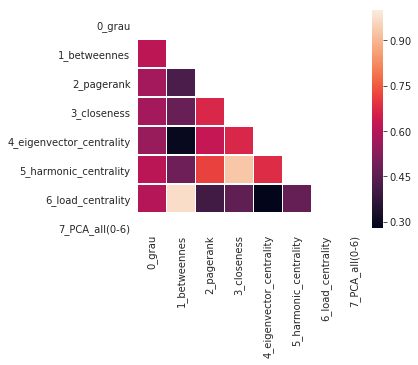

In [26]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

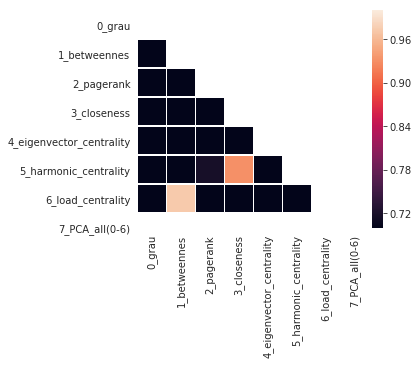

In [31]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

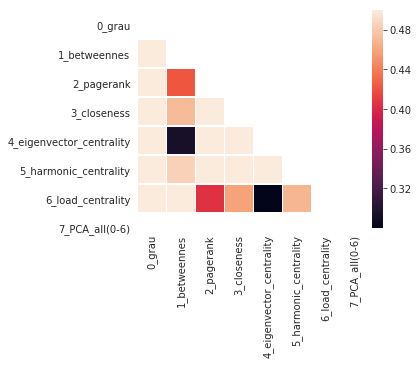

In [34]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .5,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [31]:
matrix_teste = X

In [32]:
# Alta correlacao moreno_oz

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_5 = calcula_PCA(matrix_teste,3,5)


99.9935325757
99.9996626347


In [33]:
# Baixa correlacao moreno_oz
c_1_2 = calcula_PCA(matrix_teste,1,2)
c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)



98.2075425181
94.7080101312
88.066666984
99.9996991305


In [34]:
#  adicionando na matrix temporaria moreno_oz
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))
matrix_teste.shape



(217, 14)

In [36]:
# olhando correlacao das novas medidas da matrix teste

In [37]:
# Ca-GRQC
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','35','12','13','14','15']



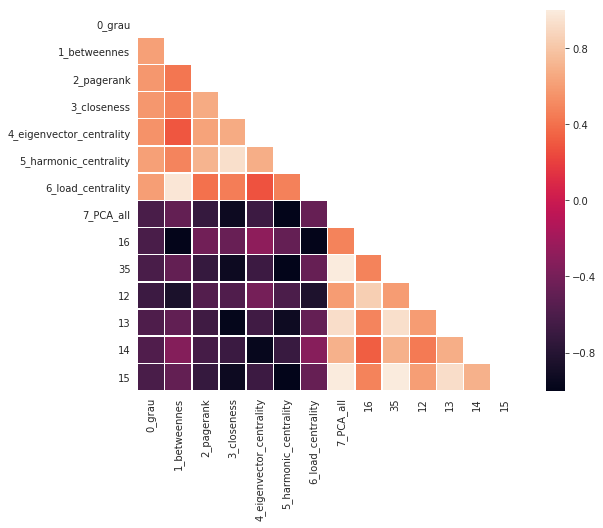

In [38]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [39]:
import pandas as pd


In [40]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [41]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],
     'm_35':c_3_5[0][:100],
     'm_12':c_1_2[0][:100],
     'm_13':c_1_3[0][:100],
     'm_14':c_1_4[0][:100],
     'm_15':c_1_5[0][:100]}

In [42]:
df = pd.DataFrame(data=d)
df.head()

0_grau  1_betweennes  2_pagerank  3_closeness  4_eigenvector_centrality  \
0      69            69         155           53                       155   
1     183           183         143          155                       143   
2     168           168          70           69                       183   
3     143            16         183          168                       184   
4      40           112         184          114                        40   

   5_harmonic_centrality  6_load_centrality  7_PCA_all  m_12  m_13  m_14  \
0                    155                 69        196     5     5     5   
1                     53                183        190   196   196   196   
2                     69                112          5   190   190   190   
3                    168                168        210   199   210   199   
4                    143                 16        199   216   199   210   

   m_15  m_1_6  m_35  
0   196      5   196  
1   190    196   190  
2     5    190     5  
3   210    188   210  
4   199    158   199

In [44]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],c_1_6[0][:50],
    c_3_5[0][:50],c_1_2[0][:50],c_1_3[0][:50],
     c_1_4[0][:50],c_1_5[0][:50]]
with open('sementes-moreno_oz.txt', 'wb') as f:
    pickle.dump(s, f)